# Predicting a continuous variable using regressor models
## Part1 - Hide a function in data

Like what we had done at the start of the course, the purpose of this notebook is to generate data that we can practice analyzing.

The notebook you should focus on is the 'seek' notebook - as the seek notebook illustrates how regressors can be used to fit the data and generate predictions.

## Adjust the following variables to change the charactistics of the data generated

The underlying generating function is more complex than the previous examples at the start of the course - but, the concept is the same. 

In [1]:
sample_size = 2000 # the number of sample observations to generate
b0 = 1       # the intercept
b1 = 1       # the x coefficient
b2 = 20       # x squared coefficient
error_mean = 0  # the mean of the error term
error_std = 500000 # the standard deviation of the error term
x_mean = 100     # the mean of the x variable
x_std = 100      # the standard deviation of the x variable

## Initial setup

Let's import a number of libraries that we expect to use

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(1) # set this to ensure the results are repeatable. 

Start by generating a set of x values. X is our input variable (also known as our input, independent, or predictor variable). We will generate one thousand x values by randomly selecting values from a gaussian distribution that has mean of 10 and standard deviaation of 2. 

In [3]:
X = np.round(np.random.normal(x_mean, x_std, sample_size),2) # we use round to limit the number of decimal places to 2

Define a hidden relationship/model and create sample data   

In [4]:
#y = b0 + b1*X**2 + b1*b2*X + b2*X**4 + b3*X**3 # third order polynomial with interaction term (b1*b2)
#y = b0 - b3*X[X>0]**(1/2)
X1 = X[X<0]
X2 = X[X>=0]
y1 = b0 - b1*X1**3
y2 = b0 - b2*X2**2
X = np.append(X1, X2)
y = np.append(y1,y2)

#y = np.append(y, b0 - b2*X[X<=0])
#y1 = b0 + b1*X**2


If you create a scatter plot of this relationship between X and y, we'll find that it's not very well hidden:

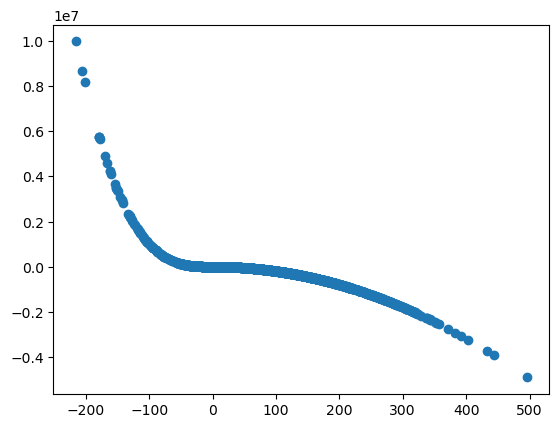

In [5]:
_ = plt.scatter(X, y) # note: the underscore is a dummy variable to catch the output of the function so that it doesn't display in the notebook

Since we want to play an interesting game of hide and seek, we need to 'hide' this relationship by adding some noise to the data. We will do this be creating a set of values called e (for error) that are drawn from a guassian distribution (aka normal distribution) with a mean of 0 and a standard deviation of 3. 

In [6]:
e1 = np.round(np.random.normal(error_mean, error_std, sample_size), 2)
#e2 = np.random.randint(-1000000, 1000000, sample_size)

Now we simple add together our y values with the associated error values.

In [7]:
Y = y + e1 

Let's plot this new X and y using a scatter plot:

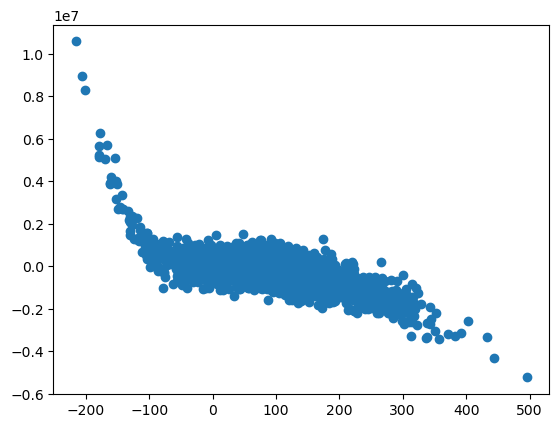

In [8]:
_ = plt.scatter(X, Y)


Now, this relationship looks a little more hidden. 

Let's now save this data to a csv that can be used by the second notebook in this exercise -- the notebook that will try to find the relationship we've hidden behind randome noise. 

In [9]:
df = pd.DataFrame({'input': X, 'target': Y})
df = df.dropna()
df.head(50)

,input,target
0,-7.30,2.451483e+05
1,-130.15,2.324013e+06
2,-106.01,9.672982e+05
3,-9.99,-3.043995e+05
4,-10.06,-1.013953e+06
5,-11.73,3.055883e+05
6,-14.25,-1.741598e+05
7,-39.65,1.386264e+05
8,-44.41,3.382260e+05
9,-102.22,6.748891e+05


In [10]:
df.to_csv('week09-generated-data.csv', index=False) # save this data to a file without the index column